# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw['FaixaLatitude'] = sinasc_raw['munResLat'].apply(
    lambda lat: 'Acima de -10.5' if lat > -10.5 else 'Abaixo ou igual a -10.5'
)

sinasc_filtrado = sinasc_raw[['FaixaLatitude', 'QTDFILVIVO', 'QTDFILMORT']].dropna()

estatisticas = sinasc_filtrado.groupby('FaixaLatitude').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(estatisticas)

                        QTDFILVIVO                                        \
                               sum      mean  min   max median       std   
FaixaLatitude                                                              
Abaixo ou igual a -10.5    12468.0  0.974824  0.0  14.0    1.0  1.108399   
Acima de -10.5             13377.0  1.109756  0.0  12.0    1.0  1.200949   

                                  QTDFILMORT                              \
                              var        sum      mean  min   max median   
FaixaLatitude                                                              
Abaixo ou igual a -10.5  1.228547     3089.0  0.241517  0.0  28.0    0.0   
Acima de -10.5           1.442279     3452.0  0.286378  0.0   9.0    0.0   

                                             
                              std       var  
FaixaLatitude                                
Abaixo ou igual a -10.5  0.598494  0.358195  
Acima de -10.5           0.624683  0.390228  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
sinasc_raw['FaixaArea'] = sinasc_raw['munResArea'].apply(
    lambda area: 'Acima de 3000' if area > 3000 else 'Abaixo ou igual a 3000'
)

variaveis = ['FaixaArea', 'IDADEMAE', 'CONSULTAS']
df_area = sinasc_raw[variaveis].dropna()

estatisticas_area = df_area.groupby('FaixaArea').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(estatisticas_area)

                       IDADEMAE                                      \
                            sum       mean min max median       std   
FaixaArea                                                             
Abaixo ou igual a 3000   137413  26.324330  11  53   26.0  6.305013   
Acima de 3000            567848  26.038518  12  53   25.0  6.405497   

                                  CONSULTAS                           \
                              var       sum      mean min max median   
FaixaArea                                                              
Abaixo ou igual a 3000  39.753192     19521  3.739655   1   9    4.0   
Acima de 3000           41.030387     77142  3.537326   1   9    4.0   

                                            
                             std       var  
FaixaArea                                   
Abaixo ou igual a 3000  0.608617  0.370414  
Acima de 3000           0.820967  0.673986  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
def classificar_altitude(alt):
    if alt <= 100:
        return 'Baixa altitude'
    elif alt <= 200:
        return 'Altitude média'
    else:
        return 'Alta altitude'

sinasc_raw['FaixaAltitude'] = sinasc_raw['munResAlt'].apply(classificar_altitude)

variaveis = ['FaixaAltitude', 'QTDFILVIVO', 'QTDFILMORT']
df_altitude = sinasc_raw[variaveis].dropna()

estatisticas_altitude = df_altitude.groupby('FaixaAltitude').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(estatisticas_altitude)


               QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
FaixaAltitude                                                               
Alta altitude      5726.0  0.942707  0.0  12.0    1.0  1.017714  1.035742   
Altitude média    11491.0  1.012869  0.0  14.0    1.0  1.164613  1.356322   
Baixa altitude     8628.0  1.162020  0.0  12.0    1.0  1.236788  1.529646   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
FaixaAltitude                                                              
Alta altitude      1463.0  0.240863  0.0  28.0    0.0  0.642198  0.412419  
Altitude média     2824.0  0.248920  0.0   9.0    0.0  0.575493  0.331193  
Baixa altitude     2254.0  0.303569  0.0   9.0    0.0  0.637563  0.406486  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [6]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<Figure size 1400x700 with 0 Axes>

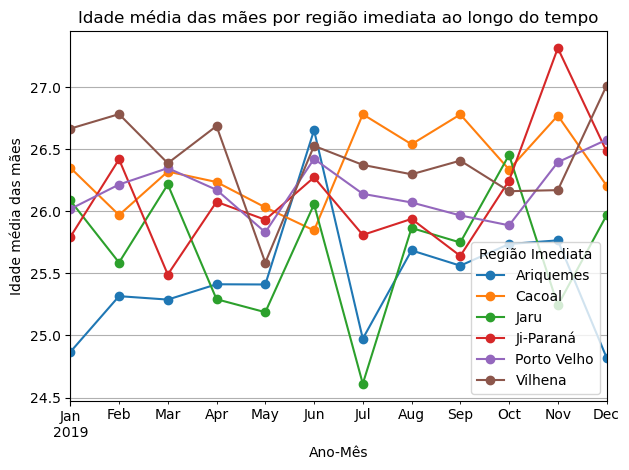

In [7]:
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

sinasc_raw['ano_mes'] = sinasc_raw['DTNASC'].dt.to_period('M')

dados_validos = sinasc_raw[(sinasc_raw['IDADEMAE'].notna()) & (sinasc_raw['regiao_imediata'].notna())]

media_idade_maes = dados_validos.groupby(['regiao_imediata', 'ano_mes'])['IDADEMAE'].mean().reset_index()

tabela_plot = media_idade_maes.pivot(index='ano_mes', columns='regiao_imediata', values='IDADEMAE')

plt.figure(figsize=(14, 7))
tabela_plot.plot(marker='o')
plt.title('Idade média das mães por região imediata ao longo do tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Idade média das mães')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [8]:
idh_map = {
    'Alto': ['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura'],
    'Médio': [
        'Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste',
        'Espigão d\'Oeste', 'Santa Luzia d\'Oeste', 'Pimenteiras do Oeste',
        'Presidente Médici', 'Castanheiras', 'Guajará-Mirim', 'Chupinguaia',
        'Cabixi', 'Candeias do Jamari', 'São Felipe d\'Oeste', 'Cacaulândia',
        'São Miguel do Guaporé', 'Mirante da Serra', 'Alvorada d\'Oeste',
        'Teixeirópolis', 'Nova Brasilândia d\'Oeste', 'Rio Crespo',
        'Primavera de Rondônia', 'Alta Floresta d\'Oeste', 'Ministro Andreazza',
        'Novo Horizonte do Oeste', 'Vale do Paraíso', 'Alto Paraíso',
        'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim',
        'Costa Marques', 'São Francisco do Guaporé', 'Urupá', 'Monte Negro'
    ],
    'Baixo': [
        'Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste',
        'Campo Novo de Rondônia', 'Alto Alegre dos Parecis', 'Theobroma',
        'Nova União', 'Nova Mamoré', 'Vale do Anari'
    ]
}

def faixa_idhm(mun):
    for cat, lista in idh_map.items():
        if mun in lista:
            return cat
    return 'Não listado'

sinasc_raw['Faixa_IDHM'] = sinasc_raw['munResNome'].apply(faixa_idhm)

vars_sel = ['Faixa_IDHM', 'PESO', 'APGAR5']
df_idh = sinasc_raw[vars_sel].dropna()

estat_idh = df_idh.groupby('Faixa_IDHM').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(estat_idh)


                 PESO                                              \
                  sum         mean  min   max  median         std   
Faixa_IDHM                                                          
Alto         54533046  3247.174348  292  5720  3275.0  550.938207   
Baixo         4300425  3245.603774  730  4785  3255.0  512.113654   
Médio        22326248  3246.981966  258  5190  3270.0  527.281096   
Não listado   6198849  3211.838860  370  5985  3250.0  556.465955   

                              APGAR5                                        \
                       var       sum      mean  min   max median       std   
Faixa_IDHM                                                                   
Alto         303532.907968  154029.0  9.171668  0.0  10.0    9.0  0.758370   
Baixo        262260.395001   12280.0  9.267925  1.0  10.0    9.0  0.807764   
Médio        278025.354147   63435.0  9.225567  0.0  10.0    9.0  0.803008   
Não listado  309654.359194   17405.0  9.018135  

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [9]:
moderado = [
    'Ariquemes','Vilhena','Pimenta Bueno','Porto Velho','Ji-Paraná',
    'Cacoal','Santa Luzia d\'Oeste','Rolim de Moura','Chupinguaia',
    'São Miguel do Guaporé','Pimenteiras do Oeste','Teixeirópolis',
    'Colorado do Oeste','Jaru','Rio Crespo','Primavera de Rondônia',
    'Alta Floresta d\'Oeste','Ouro Preto do Oeste','São Francisco do Guaporé',
    'Candeias do Jamari','Buritis','São Felipe d\'Oeste',
    'Presidente Médici','Cerejeiras','Monte Negro','Urupá'
]
regular = [
    'Espigão d\'Oeste','Seringueiras','Alvorada d\'Oeste','Itapuã do Oeste',
    'Cabixi','Novo Horizonte do Oeste','Nova Brasilândia d\'Oeste',
    'Vale do Paraíso','Corumbiara','Alto Paraíso','Cacaulândia',
    'Vale do Anari','Ministro Andreazza','Costa Marques','Nova União',
    'Guajará-Mirim','Mirante da Serra','Parecis','Castanheiras',
    'Theobroma','Machadinho d\'Oeste','Campo Novo de Rondônia',
    'Nova Mamoré','Cujubim'
]

def faixa_ifdm(mun):
    if mun in moderado:
        return 'Moderado (0.6–0.8)'
    elif mun in regular:
        return 'Regular (0.4–0.6)'
    else:
        return 'Não listado'

sinasc_raw['Faixa_IFDM'] = sinasc_raw['munResNome'].apply(faixa_ifdm)

df_ifdm = sinasc_raw[['Faixa_IFDM', 'QTDFILVIVO', 'QTDFILMORT']].dropna()

estat_ifdm = df_ifdm.groupby('Faixa_IFDM').agg({
    'QTDFILVIVO': ['sum','mean','min','max','median','std','var'],
    'QTDFILMORT': ['sum','mean','min','max','median','std','var']
})

print(estat_ifdm)

                   QTDFILVIVO                                                  \
                          sum      mean  min   max median       std       var   
Faixa_IFDM                                                                      
Moderado (0.6–0.8)    19782.0  1.015764  0.0  12.0    1.0  1.118394  1.250804   
Não listado            2227.0  1.034851  0.0  12.0    1.0  1.120451  1.255410   
Regular (0.4–0.6)      3836.0  1.192415  0.0  14.0    1.0  1.373149  1.885539   

                   QTDFILMORT                                                  
                          sum      mean  min   max median       std       var  
Faixa_IFDM                                                                     
Moderado (0.6–0.8)     5245.0  0.269320  0.0  28.0    0.0  0.620274  0.384740  
Não listado             441.0  0.204926  0.0   9.0    0.0  0.526661  0.277372  
Regular (0.4–0.6)       855.0  0.265776  0.0   7.0    0.0  0.610787  0.373060  


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [10]:
alta = ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Cacoal', 'Ariquemes']
moderado = ['Jaru', 'Rolim de Moura', 'Pimenta Bueno',
            'Guajará-Mirim', 'Ouro Preto do Oeste', 'Espigão D\'Oeste']

def faixa_pib(mun):
    if mun in alta:
        return 'Alta (PIB > 1 bi)'
    elif mun in moderado:
        return 'Moderado'
    else:
        return 'Baixo'

sinasc_raw['Faixa_PIB'] = sinasc_raw['munResNome'].apply(faixa_pib)

df_pib = sinasc_raw[['Faixa_PIB', 'IDADEPAI', 'ESCMAE2010']].dropna()

estat_pib = df_pib.groupby('Faixa_PIB').agg({
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'ESCMAE2010': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(estat_pib)


                  IDADEPAI                                                     \
                       sum       mean   min   max median       std        var   
Faixa_PIB                                                                       
Alta (PIB > 1 bi)  98886.0  31.472311  15.0  66.0   30.0  7.757940  60.185639   
Baixo              68920.0  31.031067  16.0  73.0   30.0  7.736507  59.853539   
Moderado           67169.0  30.614859  16.0  86.0   30.0  7.799165  60.826975   

                  ESCMAE2010                                                 
                         sum      mean  min  max median       std       var  
Faixa_PIB                                                                    
Alta (PIB > 1 bi)    10820.0  3.443666  0.0  9.0    3.0  1.130674  1.278424  
Baixo                 6742.0  3.035570  0.0  9.0    3.0  1.113834  1.240626  
Moderado              7136.0  3.252507  0.0  5.0    3.0  1.097215  1.203881  


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
#Notei que o município de Jaru tem os maiores picos de idades de mães mais nova por mais que o município de Ariquemes apresente em sua tragetória uma constantes de idades mais baixas. Contrapondo o município de Vilhena apresenta mais constantemente idades mais altas, porém o pico de idade mais alta é de Ji-Parana. OBs no gráfico de idades de mães por municípios ao longo do tempo.